## Iris Dataset

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris.data[0:5],'\n')
print(iris.feature_names)
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


In [4]:
print(iris.target[:5])
print(set(iris.target))
print(iris.target_names)

[0 0 0 0 0]
{0, 1, 2}
['setosa' 'versicolor' 'virginica']


In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X,y = load_iris(return_X_y=True ,as_frame=True)
print(X.head(),'\n')
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


## Iris plotting

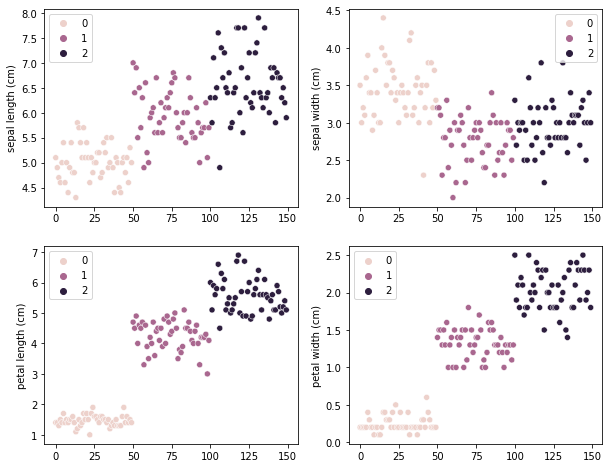

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(nrows=2 , ncols=2, figsize=(10,8))

sns.scatterplot(X.index, X['sepal length (cm)'], hue=y, ax=ax[0][0]);
ax[0][0].legend()
sns.scatterplot(X.index, X['sepal width (cm)'], hue=y, ax=ax[0][1]);
ax[0][1].legend()
sns.scatterplot(X.index, X['petal length (cm)'], hue=y, ax=ax[1][0]);
ax[1][0].legend()
sns.scatterplot(X.index, X['petal width (cm)'], hue=y, ax=ax[1][1]);
ax[1][1].legend();

In [8]:
pip install plotly_express &> /dev/null

In [9]:
import plotly_express as px

px.scatter_3d(X, x="petal length (cm)", y="petal width (cm)", z="sepal length (cm)", 
              size="sepal width (cm)", color=y)

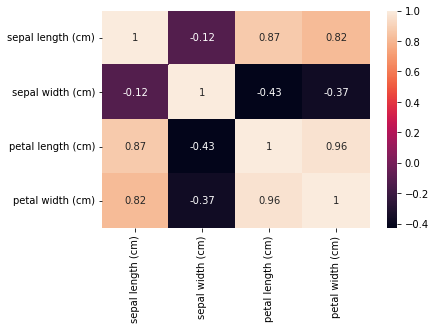

In [10]:
sns.heatmap(X.corr(), annot=True);

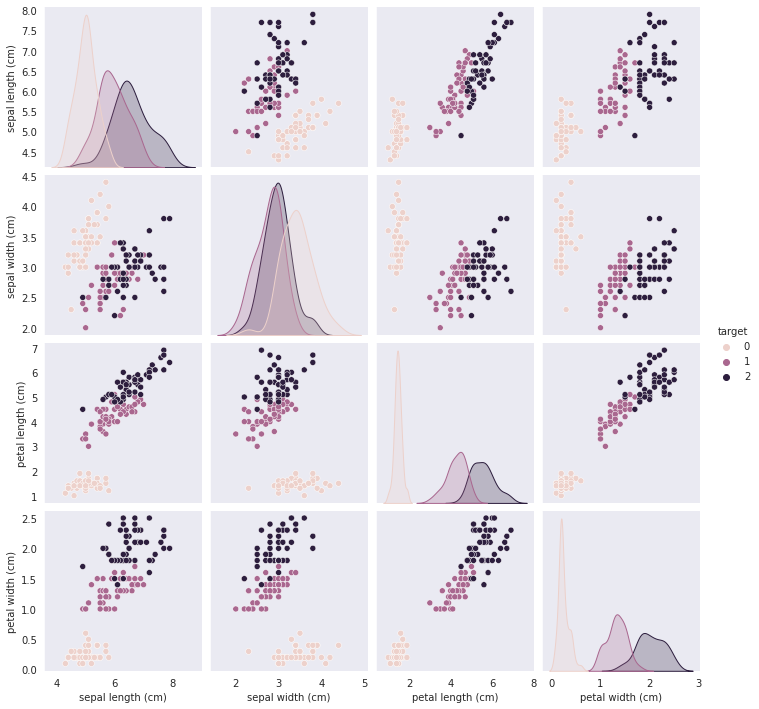

In [11]:
df = X
df['target'] = y
sns.set_style('dark')
sns.pairplot(df, hue='target')
df.drop('target', axis=1, inplace=True);

## Iris preprocessing

In [12]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X.head())
minmax_df = pd.DataFrame(scaler.transform(X.head()).round(2), columns=X.columns)
minmax_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.0,0.83,0.5,0.0
1,0.6,0.00,0.5,0.0
2,0.2,0.33,0.0,0.0
3,0.0,0.17,1.0,0.0
4,0.8,1.00,0.5,0.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X.head())
standard_df = pd.DataFrame(scaler.transform(X.head()).round(2), columns=X.columns)
standard_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.29,0.95,0.00,0.0
1,0.22,-1.21,0.00,0.0
2,-0.86,-0.35,-1.58,0.0
3,-1.40,-0.78,1.58,0.0
4,0.75,1.38,0.00,0.0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
X_norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.2, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_norm_train.shape, y_norm_train.shape)
print(X_norm_test.shape, y_norm_test.shape)

(120, 4) (120,)
(30, 4) (30,)
(120, 4) (120,)
(30, 4) (30,)


In [17]:
_, _, y_train_1, _ = train_test_split(X, y, test_size=0.2, random_state=1)
_, _, y_train_2, _ = train_test_split(X, y, test_size=0.2, random_state=1)
_, _, y_train_3, _ = train_test_split(X, y, test_size=0.2, random_state=1)

print(y_train_1.head())
print(y_train_2.head())
print(y_train_3.head())

91     1
135    2
69     1
128    2
114    2
Name: target, dtype: int64
91     1
135    2
69     1
128    2
114    2
Name: target, dtype: int64
91     1
135    2
69     1
128    2
114    2
Name: target, dtype: int64


In [18]:
_, _, y_train_1, _ = train_test_split(X, y, test_size=0.2)
_, _, y_train_2, _ = train_test_split(X, y, test_size=0.2)
_, _, y_train_3, _ = train_test_split(X, y, test_size=0.2)

print(y_train_1.head())
print(y_train_2.head())
print(y_train_3.head())

103    2
22     0
89     1
102    2
144    2
Name: target, dtype: int64
58     1
74     1
89     1
59     1
142    2
Name: target, dtype: int64
123    2
88     1
61     1
12     0
131    2
Name: target, dtype: int64


## Linear Regression

In [19]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


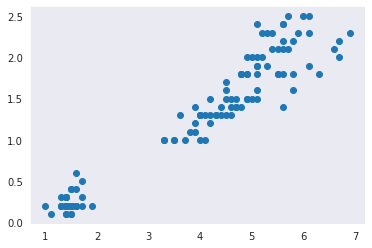

In [20]:
X_train_1 = X_train['petal length (cm)'].values.reshape(-1,1)
y_train_1 = X_train['petal width (cm)']

plt.scatter(X_train_1, y_train_1)

In [21]:
from sklearn.linear_model import LinearRegression

X_test_1 = X_test['petal length (cm)'].values.reshape(-1,1)
y_test_1 = X_test['petal width (cm)']

model = LinearRegression()
model.fit(X_train_1, y_train_1)
print(model.score(X_test_1, y_test_1))

0.927934211107492


In [22]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test_1)
print(mean_squared_error(pred, y_test_1))

0.03494710322694023


In [23]:
m = model.coef_
c = model.intercept_

m , c 

(array([0.42186798]), -0.38815031969628944)

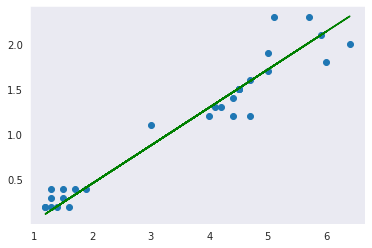

In [24]:
plt.scatter(X_test_1, y_test_1)
plt.plot(X_test_1, m*X_test_1+c, color='g')

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))
for i,j in zip(y_test[:5], y_pred[:5]):
  print(f'Real value : {i}, Predicted value : {j}')
print('\n')

0.9666666666666667
Real value : 0, Predicted value : 0
Real value : 1, Predicted value : 1
Real value : 1, Predicted value : 1
Real value : 0, Predicted value : 0
Real value : 2, Predicted value : 2




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_test), y_test))

0.9666666666666667


In [27]:
model = LogisticRegression()
model.fit(X_norm_train, y_norm_train)
print(accuracy_score(model.predict(X_norm_test), y_norm_test))

0.9666666666666667


In [28]:
from sklearn.model_selection import cross_val_score

new_model = LogisticRegression()
val_score = cross_val_score(new_model, X_norm, y, cv=5, scoring='accuracy')
print('each value score:', val_score)
print('mean value score:', val_score.mean().round(2))

each value score: [0.96666667 1.         0.93333333 0.9        1.        ]
mean value score: 0.96


## Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_pred, y_test))

0.9666666666666667
0.9666666666666667


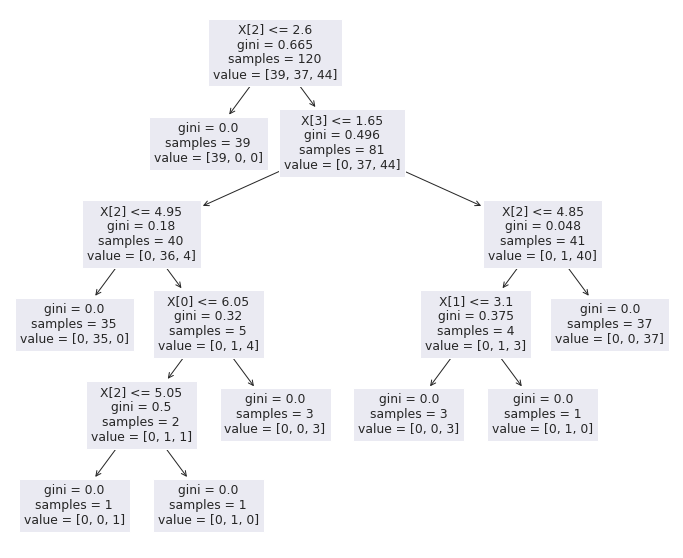

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,10))
plot_tree(dt_clf);

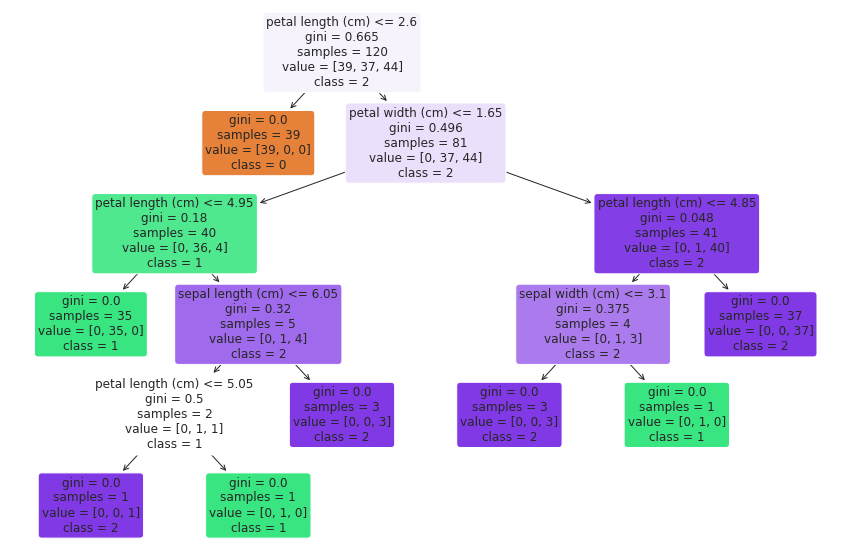

In [31]:
plt.figure(figsize=(15,10))
plot_tree(dt_clf, filled=True, rounded=True,
          class_names=['0','1','2'], feature_names= X_train.columns);

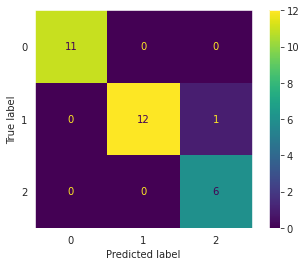

In [32]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test,
                      display_labels=['0','1','2']);

In [33]:
false = ((y_pred==2) & (y_test == 1))
false_idx = false[false].index
X.loc[false_idx]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
77,6.7,3.0,5.0,1.7


In [34]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
print(ccp_alphas)

[0.         0.00666667 0.00813008 0.04666667 0.25871926]


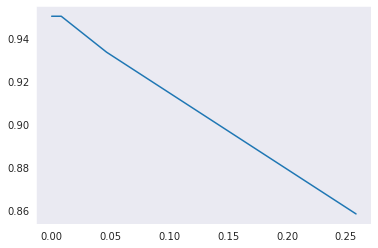

In [35]:
alpha_score = []

for ccp in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=ccp, random_state=0)
  scores = cross_val_score(clf, X_train, y_train)
  alpha_score.append([ccp, scores.mean()])

alpha_df = pd.DataFrame(alpha_score, columns=['alpha', 'acc']) 
plt.plot(alpha_df['alpha'], alpha_df['acc']);

In [36]:
alpha_df

,alpha,acc
0,0.000000,0.950000
1,0.006667,0.950000
2,0.008130,0.950000
3,0.046667,0.933333
4,0.258719,0.858333


In [37]:
clf = DecisionTreeClassifier(ccp_alpha=0.008130, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

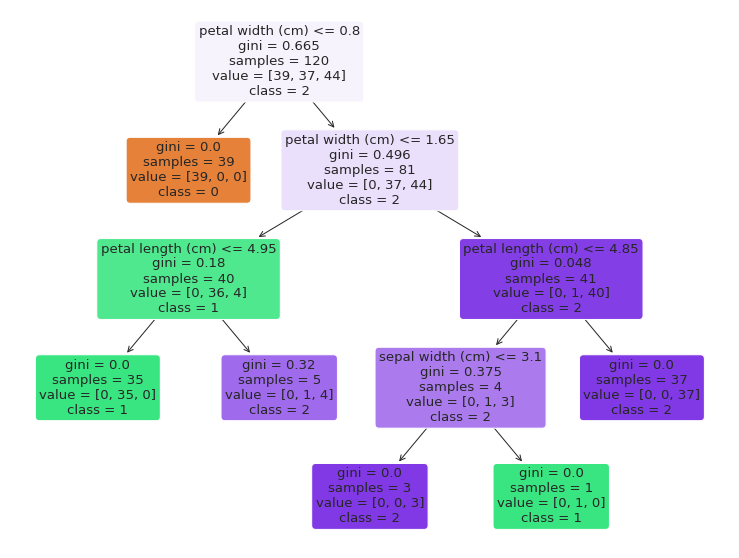

In [38]:
plt.figure(figsize=(13,10))
plot_tree(clf, filled=True, rounded=True,
          class_names=['0','1','2'], feature_names= X_train.columns);

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.9666666666666667


## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_norm_train, y_norm_train)
pred = model.predict(X_norm_test)
print(accuracy_score(pred, y_norm_test))

1.0


In [41]:
for k in range(1,11):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_norm_train, y_norm_train)
  pred = model.predict(X_norm_test)
  print(k,accuracy_score(pred, y_norm_test))

1 1.0
2 1.0
3 1.0
4 1.0
5 0.9666666666666667
6 1.0
7 0.9666666666666667
8 1.0
9 1.0
10 1.0


In [42]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X_norm_train)

temp=pca.transform(X_norm_train)
print(temp.shape)

print(pca.explained_variance_ratio_)

(120, 4)
[0.73926948 0.21512414 0.0410715  0.00453488]


In [43]:
pca=PCA(n_components=2)
pca.fit(X_norm_train)

pca_X_norm_train = pca.transform(X_norm_train)
pca_X_norm_test = pca.transform(X_norm_test)

print(pd.DataFrame(pca.components_,columns=X_norm_train.columns, index = ['PC-1','PC-2']))
# source : https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

print(pca_X_norm_train.shape)
print(pca.explained_variance_ratio_)

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC-1           0.530056         -0.235161           0.580480          0.571650
PC-2           0.331467          0.940978           0.012167          0.067389
(120, 2)
[0.73926948 0.21512414]


In [44]:
for k in range(1,11):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(pca_X_norm_train, y_norm_train)
  pred = model.predict(pca_X_norm_test)
  print(k,accuracy_score(pred, y_norm_test))

1 0.9
2 0.9
3 0.9333333333333333
4 0.9666666666666667
5 0.9333333333333333
6 0.9666666666666667
7 0.9666666666666667
8 0.9666666666666667
9 0.9666666666666667
10 0.9666666666666667


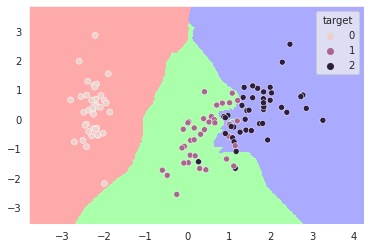

In [45]:
# https://scikit-learn.org/0.18/auto_examples/neighbors/plot_classification.html

from matplotlib.colors import ListedColormap
import numpy as np

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = pca_X_norm_train[:, 0].min() - 1, pca_X_norm_train[:, 0].max() + 1
y_min, y_max = pca_X_norm_train[:, 1].min() - 1, pca_X_norm_train[:, 1].max() + 1

h=0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

model = KNeighborsClassifier(n_neighbors=5)
model.fit(pca_X_norm_train, y_norm_train)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(pca_X_norm_train[:,0], pca_X_norm_train[:,1], hue=y_norm_train, cmap=cmap_bold);

## SVM

In [46]:
pd.concat([X_train[X_train.columns],y_train], axis=1).corr()['target']

sepal length (cm)    0.779219
sepal width (cm)    -0.395370
petal length (cm)    0.950864
petal width (cm)     0.956047
target               1.000000
Name: target, dtype: float64

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



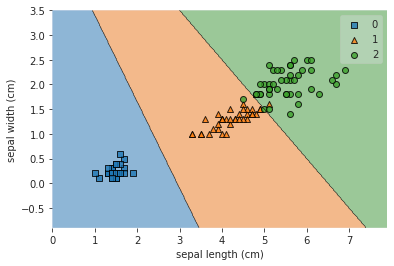

In [47]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

X_temp_train = X_train.iloc[:,2:4]
print(X_temp_train.columns)
svm = SVC(kernel='linear')
svm.fit(X_temp_train, y_train)
plot_decision_regions(X_temp_train.to_numpy(), y_train.to_numpy(), clf=svm)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)');

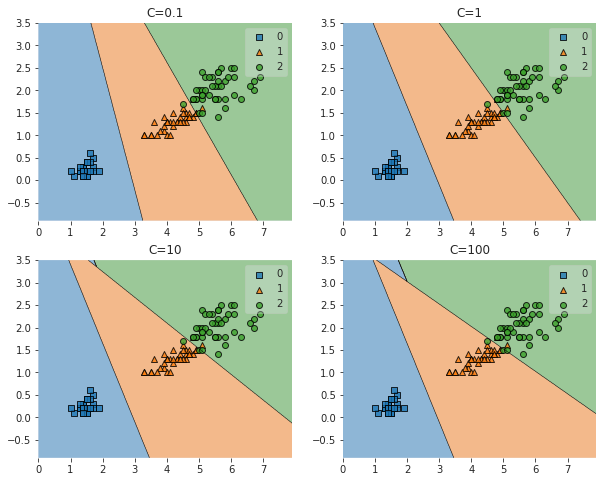

In [48]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

import matplotlib.gridspec as gridspec
import itertools
import warnings
warnings.filterwarnings("ignore")

clf1 = SVC(kernel='linear', C=0.1)
clf2 = SVC(kernel='linear', C=1)
clf3 = SVC(kernel='linear', C=10)
clf4 = SVC(kernel='linear', C=100)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['C=0.1', 'C=1', 'C=10', 'C=100']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_temp_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_temp_train.to_numpy(), y_train.to_numpy(), clf=clf)
    plt.title(lab)

plt.show()

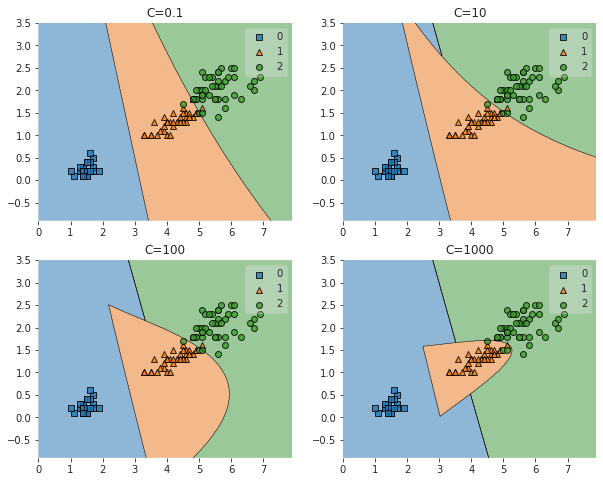

In [49]:
clf1 = SVC(kernel='poly', C=0.1)
clf2 = SVC(kernel='poly', C=10)
clf3 = SVC(kernel='poly', C=100)
clf4 = SVC(kernel='poly', C=1000)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['C=0.1', 'C=10', 'C=100', 'C=1000']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_temp_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_temp_train.to_numpy(), y_train.to_numpy(), clf=clf)
    plt.title(lab)

plt.show()

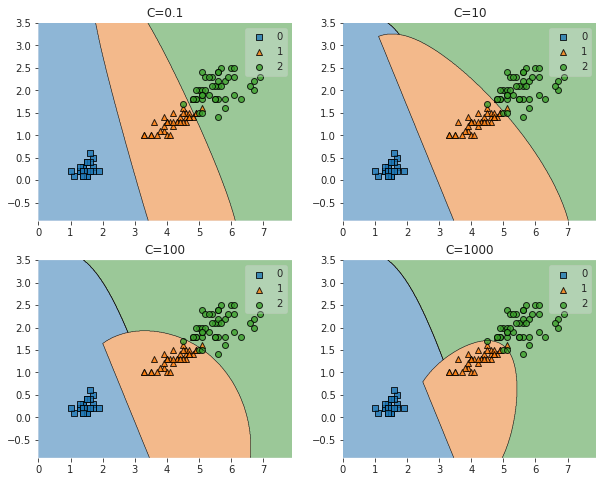

In [50]:
clf1 = SVC(kernel='rbf', C=0.1)
clf2 = SVC(kernel='rbf', C=10)
clf3 = SVC(kernel='rbf', C=100)
clf4 = SVC(kernel='rbf', C=1000)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['C=0.1', 'C=10', 'C=100', 'C=1000']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_temp_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_temp_train.to_numpy(), y_train.to_numpy(), clf=clf)
    plt.title(lab)

plt.show()

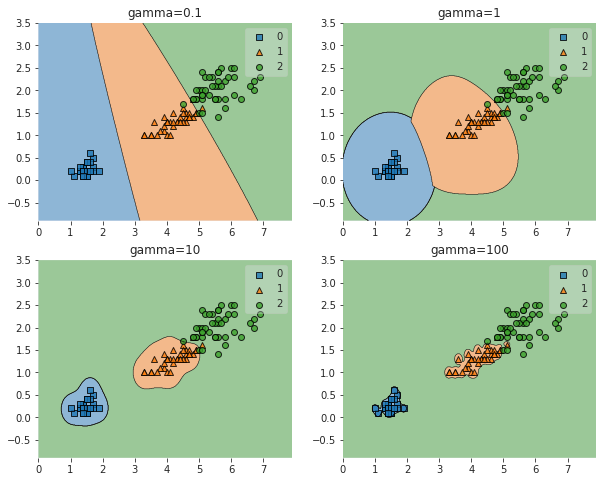

In [51]:
clf1 = SVC(kernel='rbf', gamma=0.1)
clf2 = SVC(kernel='rbf', gamma=1)
clf3 = SVC(kernel='rbf', gamma=10)
clf4 = SVC(kernel='rbf', gamma=100)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['gamma=0.1', 'gamma=1', 'gamma=10', 'gamma=100']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_temp_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_temp_train.to_numpy(), y_train.to_numpy(), clf=clf)
    plt.title(lab)

plt.show()

Index(['sepal length (cm)', 'petal length (cm)'], dtype='object')


Text(0, 0.5, 'petal length (cm)')

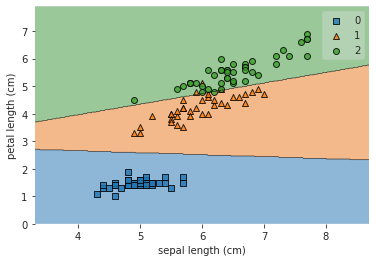

In [52]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

X_temp_train = X_train.iloc[:,[0,2]]
print(X_temp_train.columns)
svm = SVC(kernel='linear')
svm.fit(X_temp_train, y_train)
plot_decision_regions(X_temp_train.to_numpy(), y_train.to_numpy(), clf=svm)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

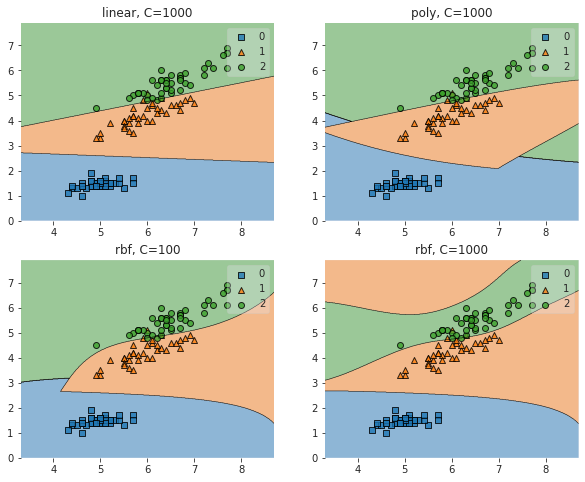

In [53]:
clf1 = SVC(kernel='linear', C=1000)
clf2 = SVC(kernel='poly', C=1000)
clf3 = SVC(kernel='rbf', C=100)
clf4 = SVC(kernel='rbf', C=1000)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['linear, C=1000', 'poly, C=1000', 'rbf, C=100', 'rbf, C=1000']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_temp_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_temp_train.to_numpy(), y_train.to_numpy(), clf=clf)
    plt.title(lab)

plt.show()

In [54]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma='scale', C=1.0)
svc.fit(X_norm_train, y_norm_train)
print(accuracy_score(svc.predict(X_norm_test), y_norm_test))

0.9666666666666667


In [55]:
from sklearn.svm import SVR

X_svr_train = X_norm_train.iloc[:,:-1]
y_svr_train = X_norm_train.iloc[:,-1]
X_svr_test = X_norm_test.iloc[:,:-1]
y_svr_test = X_norm_test.iloc[:,-1]

svr = SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=0.1)
svr.fit(X_svr_train, y_svr_train)
print(mean_squared_error(svr.predict(X_svr_test), y_svr_test))

0.06006081802128772


## Grid Search CV

In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear', 'poly', 'rbf'], 
              'C':[0.1,1,10,100],
              'gamma':['scale', 'auto', 0.1, 1, 5]}
svc = SVC()
clf = GridSearchCV(svc, parameters, verbose=1)
clf.fit(X_norm_train, y_norm_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [57]:
clf.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [58]:
clf.best_score_

0.975

In [59]:
clf.best_estimator_

SVC(C=1, kernel='linear')

In [60]:
model = clf.best_estimator_
print(accuracy_score(model.predict(X_norm_test), y_norm_test))

0.9666666666666667


In [61]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True],
              'max_depth': [6,8,None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [2, 4],
              'min_samples_split': [2, 5],
              'n_estimators': [100]}

svc = RandomForestClassifier()
clf = GridSearchCV(svc, parameters, verbose=2)
clf.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 

In [62]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.9583333333333334


In [63]:
model = clf.best_estimator_
print(accuracy_score(model.predict(X_test), y_test))

0.9666666666666667
